In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("train.csv")

In [3]:
X = df[['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors', 'Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']]
y = df.Lead

In [4]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)


Training set shape:  (727, 13) (727,)
Testing set shape:  (312, 13) (312,)


In [5]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=10, max_depth=5, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.883
Accuracy score (validation): 0.792
Learning rate:  0.075
Accuracy score (training): 0.924
Accuracy score (validation): 0.814
Learning rate:  0.1
Accuracy score (training): 0.950
Accuracy score (validation): 0.837
Learning rate:  0.25
Accuracy score (training): 0.999
Accuracy score (validation): 0.865
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.840
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.824
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.833


In [6]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=10, max_depth=5, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[ 43  39]
 [ 16 214]]


Text(0.5, 15.0, 'Predicted label')

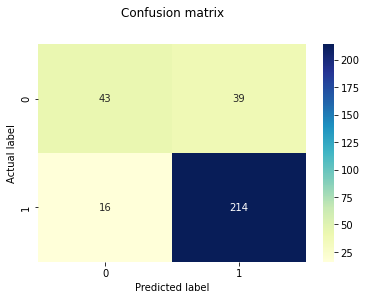

In [7]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

      Female       0.73      0.52      0.61        82
        Male       0.85      0.93      0.89       230

    accuracy                           0.82       312
   macro avg       0.79      0.73      0.75       312
weighted avg       0.82      0.82      0.81       312



In [9]:
# Tuning the model
param_test1 = {'n_estimators':range(10,100,10)}
from sklearn.model_selection import GridSearchCV
mymodel = GradientBoostingClassifier()
CV_gbc = GridSearchCV(estimator=mymodel, param_grid=param_test1, scoring='roc_auc',n_jobs=4, cv= 5)
CV_gbc.fit(X_train,y_train)
CV_gbc.best_params_, CV_gbc.best_score_

({'n_estimators': 90}, 0.8902142478613067)

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_clf2, X, y, cv =5)

In [11]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8421311780007432


In [12]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
print(f'Accuracy = {(tp+tn)/(tp+fp+tn+fn):.3f}')
print(f'Precision = {(tp)/(tp+fp):.3f}')
print(f'Sensitivity = {(tp)/(tp+fn):.3f}')
print(f'Specificity = {(tn)/(fp+tn):.3f}')

Accuracy = 0.824
Precision = 0.846
Sensitivity = 0.930
Specificity = 0.524
